sythdid: Synthetic Difference in Difference Estimation

Class input Synthdid: 
outcome: Outcome variable (numeric)
unit: Unit variable (numeric or string)
time: Time variable (numeric)
quota: Dummy of treatement, equal to 1 if units are treated, and otherwise 0 (numeric)

Methods:
* fit(cov_method = ["optimized", "projected"])
* vcov(method = ["placebo", "bootstrap", "jackknife"], n_reps:int = 50)

Example: California

https://pypi.org/project/synthdid/

In [25]:
#pip install synthdid

In [22]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

from synthdid.synthdid import Synthdid as sdid
from synthdid.get_data import quota, california_prop99
pd.options.display.float_format = '{:.4f}'.format

In [3]:
# Estimations with Standard Variance-Covariance Estimation
california_estimate = sdid(california_prop99(), unit="State", time="Year", treatment="treated", outcome="PacksPerCapita").fit().vcov(method='placebo')
california_estimate.summary().summary2

ATT  Std. Err.       t  P>|t|
0 -15.6038    10.9765 -1.4216 0.1552

In [5]:
#Estimations without Standard Variance-Covariance Estimation
california_estimate = sdid(california_prop99(), "State", "Year", "treated", "PacksPerCapita").fit()
california_estimate.summary().summary2

ATT Std. Err.  t P>|t|
0 -15.6038         -  -     -

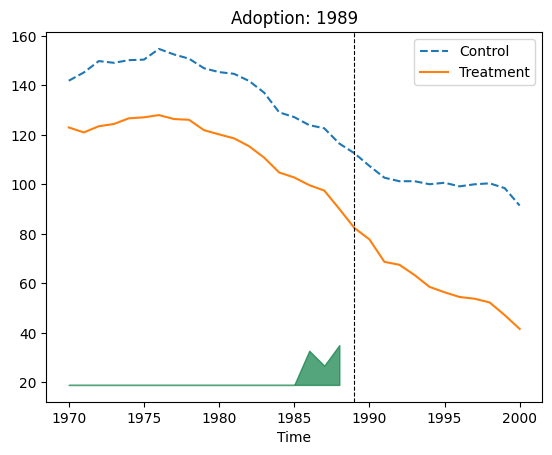

In [6]:
#Plot
california_estimate.plot_outcomes();

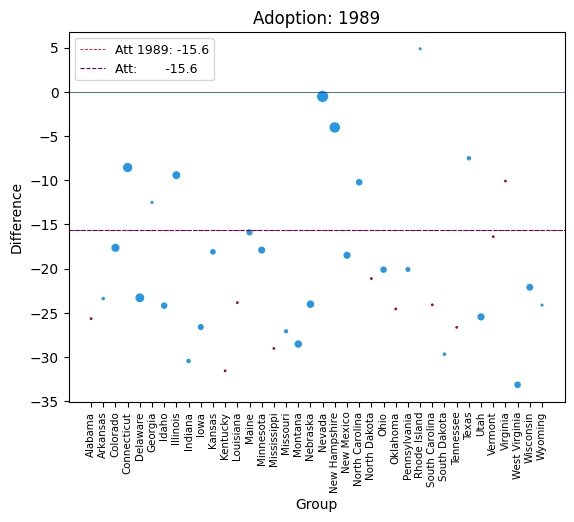

In [10]:
california_estimate.plot_weights()

In [11]:
# Quota
quota_estimate = sdid(quota(), "country", "year", "quota", "womparl").fit()

In [12]:
quota_estimate.vcov().summary().summary2 ## placebo 

ATT  Std. Err.      t  P>|t|
0 8.0341     1.7982 4.4679 0.0000

In [13]:
#With covariates
quota_cov = quota().dropna(subset="lngdp")
quota_cov_est = sdid(quota_cov, "country", 'year', 'quota', 'womparl', covariates=['lngdp']).fit()
quota_cov_est.summary().summary2

ATT Std. Err.  t P>|t|
0 8.0490         -  -     -

In [14]:
#Covariable method = 'projected'
quota_cov_est.fit(cov_method="projected").summary().summary2

ATT Std. Err.  t P>|t|
0 8.0590         -  -     -

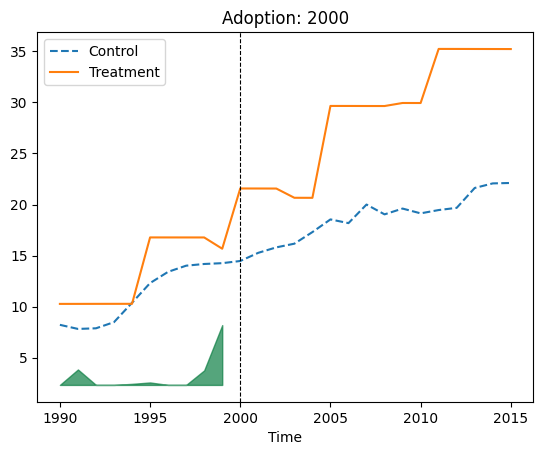

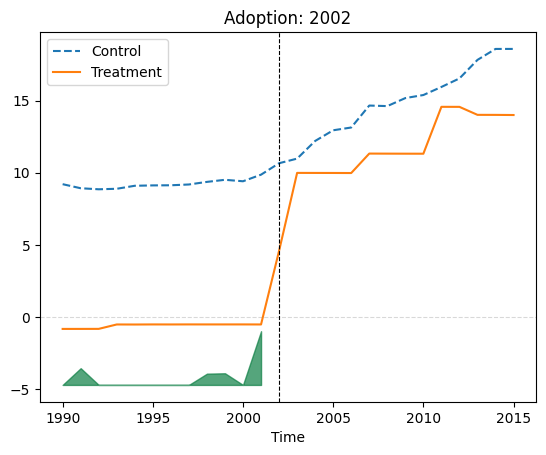

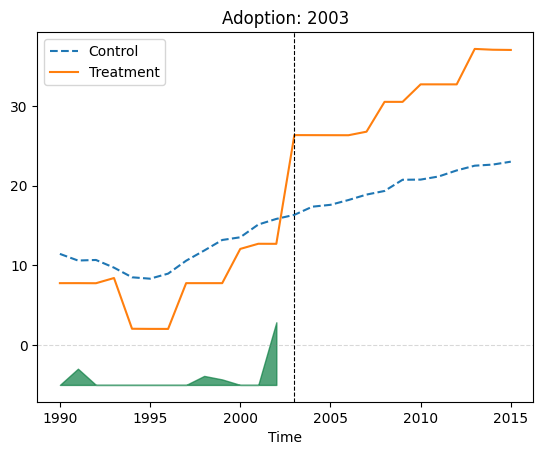

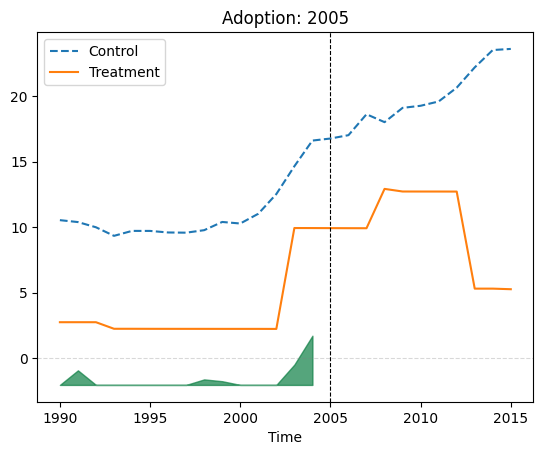

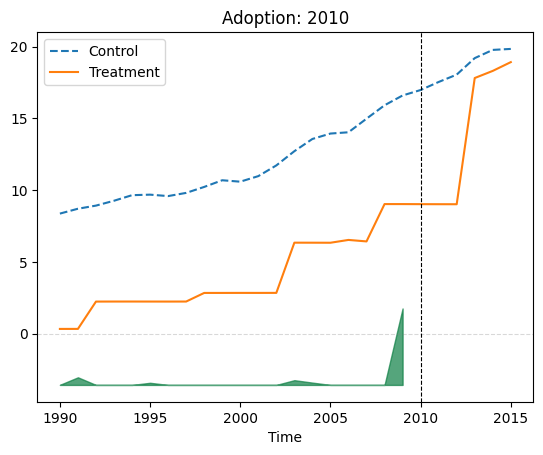

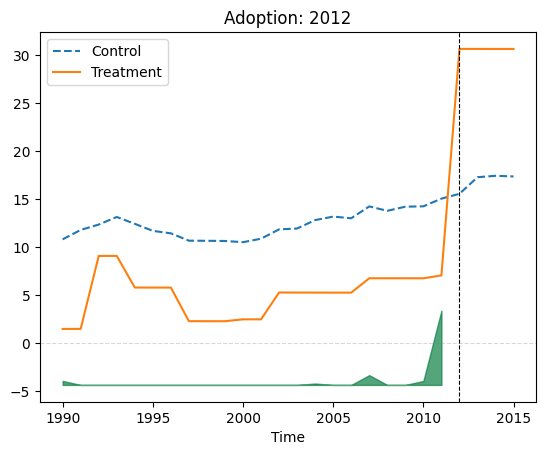

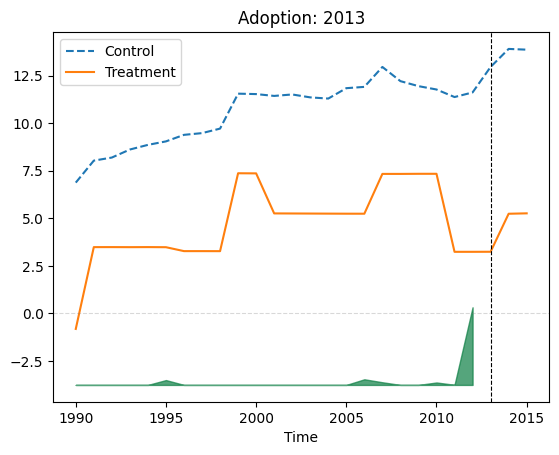

In [15]:
quota_cov_est.plot_outcomes()

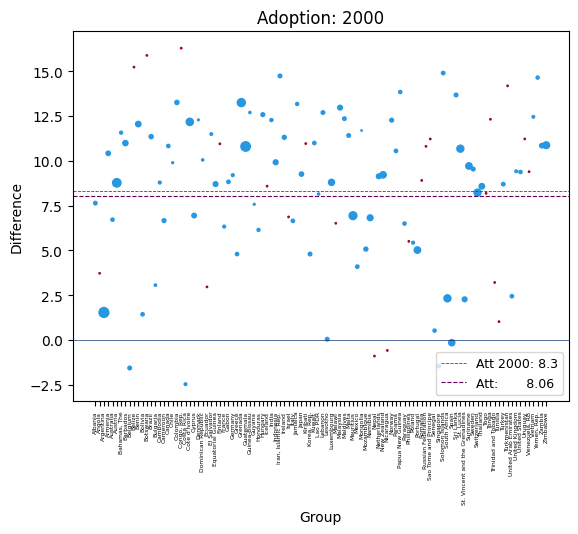

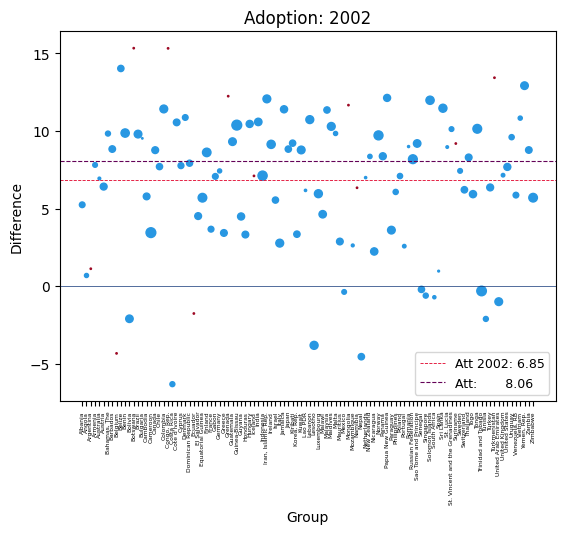

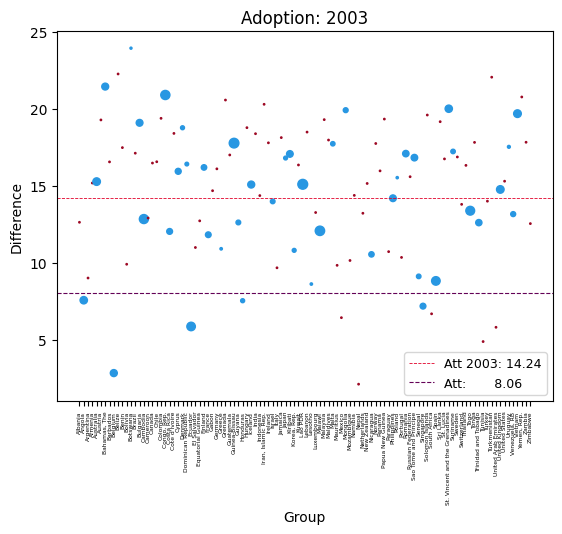

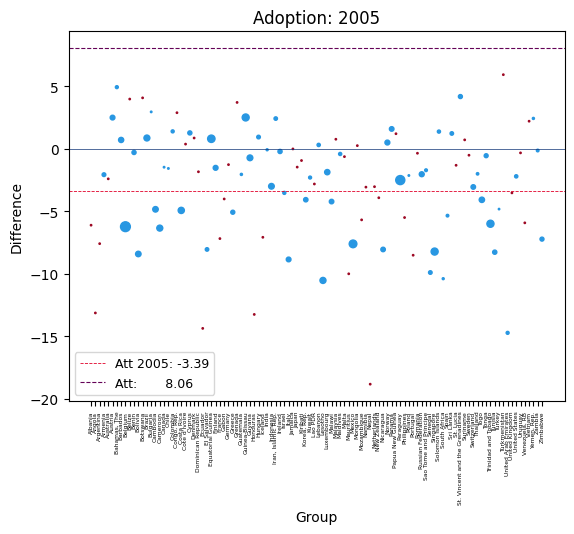

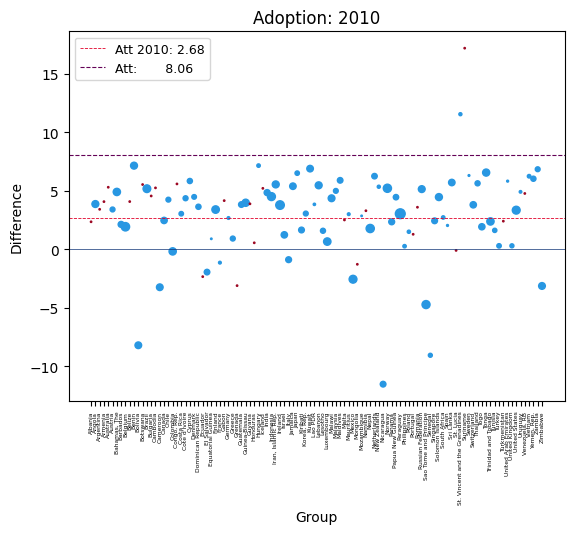

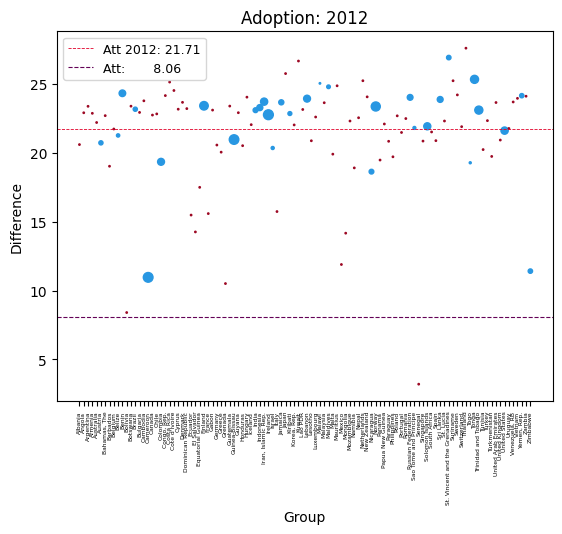

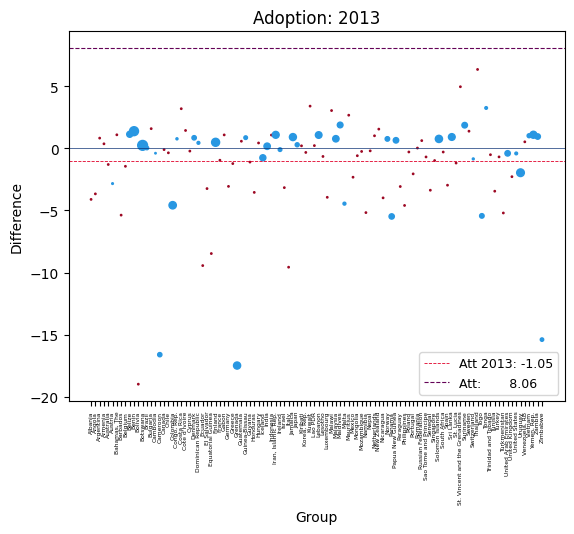

In [16]:
quota_cov_est.plot_weights()